
Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/geo_hole_quad_part_4.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/geo_hole_quad_part_4.msh successfully imported. 
Assign a material to a physical group.
*************************************************************
WARNING. Please provide a elem_group_series for split mesh in grops.
WARNING. Please provide a elem_group_series for split mesh in grops.
Extract interface node from sub_3 and sub_1
Extract interface node from sub_3 and sub_2
Extract interface node from sub_3 and sub_4
Extract interface node from sub_1 and sub_2
Interface nodes from sub_1 and sub_3 already extracted
Interface nodes from sub_2 and sub_1 already extracted
Interface nodes from sub_2 and sub_3 already extracted
Extract interface node from sub_2 and sub_4
Interface nodes from sub_4 and sub_2 al

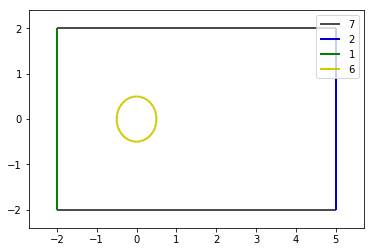

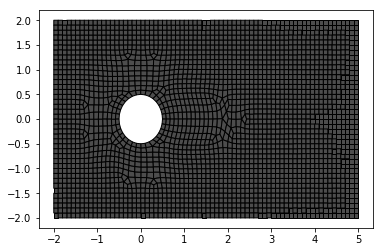

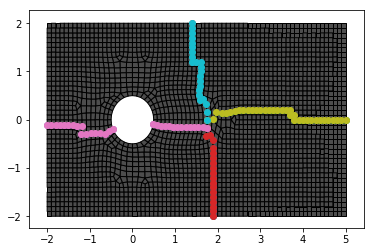

In [1]:
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy

msh_dict = {}
msh_dict[1] = mshfile = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')
msh_dict[2] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_quad_mesh.msh')
msh_dict[3] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_2quad_mesh.msh')
msh_dict[4] = mshfile = amfe.amfe_dir('meshes/test_meshes/4_partitions_quad_mesh.msh')


domain_id = {}
domain_id[1] = 8
domain_id[2] = 3
domain_id[3] = 3
domain_id[4] = 3

# select mesh to be plotted
mesh_id = 1
mshfile = msh_dict[mesh_id]

m = amfe.Mesh()
m.import_msh(mshfile)


# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)


# splitting physical grops

m.split_in_groups()

# plotting boundary elements
amfe.plot_boundary_1d(m)


# plotting mesh
amfe.plot_submesh(m.groups[domain_id[mesh_id]])


# setting boundary condition
# selecting subdomain for boundary condition
sub_dir = m.get_submesh('physical',1)
sub_neu = m.get_submesh('physical',2)

value = 5.0E9
neu = amfe.boundary.Boundary(sub_neu,value,'normal')
diri = amfe.boundary.Boundary(sub_dir,0,'xy','dirichlet')


# setting main domain for FE calculation
domain = m.set_domain('phys_group', domain_id[mesh_id])
domain.set_material(my_material)
domain.append_bondary_condition(neu)
domain.append_bondary_condition(diri)
domain.split_in_partitions()

amfe.plot_domain(domain)

plt.show()

In [2]:
m.el_df

,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,5,6,7,8
0,1,straight_line,4,7,1,1,1,None,2,6,NaN,NaN
1,2,straight_line,4,7,1,1,1,None,6,7,NaN,NaN
2,3,straight_line,4,7,1,1,1,None,7,8,NaN,NaN
3,4,straight_line,4,7,1,1,1,None,8,9,NaN,NaN
4,5,straight_line,4,7,1,1,1,None,9,10,NaN,NaN
5,6,straight_line,4,7,1,1,1,None,10,11,NaN,NaN
6,7,straight_line,4,7,1,1,1,None,11,12,NaN,NaN
7,8,straight_line,4,7,1,1,1,None,12,13,NaN,NaN
8,9,straight_line,4,7,1,1,1,None,13,14,NaN,NaN
9,10,straight_line,4,7,1,1,1,None,14,15,NaN,NaN


Solving the Standard FE problem
---------------------------

$$
Ku = f
$$

In [3]:
scale = 1
my_system = amfe.MechanicalSystem()
my_system.set_mesh_obj(m)
my_system.set_domain(domain_id[mesh_id],my_material)
my_system.apply_dirichlet_boundaries(1, 'xy')
my_system.apply_neumann_boundaries(2, value, 'normal')

s = amfe.LinearStaticsSolver(my_system)
s.solve()

u_fea = my_system.u_output[1]
connectivity = my_system.mesh_class.connectivity
nodes = my_system.mesh_class.nodes


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_static(scale=0):
    amfe.plotDeformQuadMesh(connectivity,nodes,my_system.u_output[1],scale) 
    plt.show()
    
interact(plot_static,mode=(0,10,1),scale=(0,10,1))

*************************************************************

 phys_group 8 with 2598 elements successfully added.
Total number of elements in mesh: 2598
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2598 elements and 5448 dofs.
Time taken for preallocation: 0.04 seconds.

 phys_group 1 with 41 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 41
Total number of constrained dofs: 82
*************************************************************

 phys_group 2 with 40 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 40
Total number of elements in mesh: 2598
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


A Jupyter Widget

<function __main__.plot_static>

Solving with Dual Assembly
---------------------------

$$
\begin{bmatrix} K & B^{T} \\
                 B & 0  
\end{bmatrix}
\begin{bmatrix} u \\ 
\lambda \end{bmatrix}
=
\begin{bmatrix} f \\ 
0 \end{bmatrix}
$$

Generally the block matrix $K$ is singular due to local rigid body modes, then the inner problem is regularized by adding a subset of the inter-subdomain compatibility requeriments:


$$
\begin{bmatrix} K & B^TG^{T} & B^{T} \\
                GB & 0 & 0   \\
                B & 0 & 0   \\
\end{bmatrix}
\begin{bmatrix} u \\ 
\alpha \\
\lambda \end{bmatrix}
=
\begin{bmatrix} f \\ 
0 \\
0 \end{bmatrix}
$$

Where $G$ is defined as $-R^TB^T$.

In [4]:
super_domain = amfe.SuperDomain(domain.groups)

B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 649 elements and 1418 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 650 elements and 1428 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 649 elements and 1404 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 650 elements and 1414 dofs.
Time taken for preallocation: 0.01 seconds.


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [5]:
u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,mode=(0,10,1),scale=(0,10,1))  



A Jupyter Widget

<function __main__.plot_static>

Solving Equilibrium with Dual Interface Assembly Problem
----------------------------------------------

The Dual Assembly system of equation discribe above can be broken in two equations.

\begin{equation}
Ku + B^{T}\lambda  = f \\
Bu = 0 
\end{equation}

Then, the solution u can be calculate by:

\begin{equation}
u =  K^*(B^{T}\lambda  + f) +  R\alpha \\
\end{equation}

Where $K^*$ is the generelize pseudo inverse and $R$ is $Null(K) = \{r \in R: Kr=0\}$, named the kernel of the K matrix.
In order to the solve $u$ the summation of all forces in the subdomain, interface, internal and extenal forces must be in the image of K. This implies the $(B^{T}\lambda  + f)$ must be orthonal to the null space of K.

\begin{equation}
R(B^{T}\lambda  + f) = 0 \\
\end{equation}

Phisically, the equation above eforces the self-equilibrim for each subdomain. Using the compatibility equation and the self-equilibrium equation, we can write the dual interface equilibrium equation as:


$$
\begin{bmatrix} F & G^{T} \\
                 G & 0  
\end{bmatrix}
\begin{bmatrix} \lambda  \\ 
\alpha
\end{bmatrix}
=
\begin{bmatrix} d \\ 
e \end{bmatrix}
$$

Where $F = BK^*B^T$, $G = -R^TB^T$, $d = BK^*f$ and $e =- R^Tf $.


In [6]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,mode=(0,10,1),scale=(0,10,1))          

A Jupyter Widget

<function __main__.plot_static>

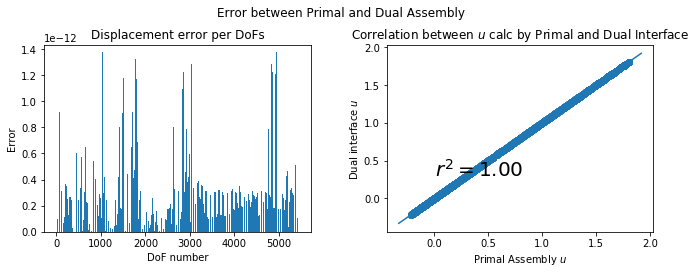

In [7]:
u_dual_int = amfe.FetiSolver.average_displacement_calc(my_system,super_domain.feti_subdomains_dict)

residual = abs(u_fea - u_dual_int)
p , residuals, rank, singular_values, rcond = np.polyfit(u_fea, u_dual_int, 1, full=True)
m = p[0]
b = p[1]


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=4.0, w_pad=4.5, h_pad=4.0)

axs[0].bar(np.arange(len(residual)),residual)
axs[0].set_title('Displacement error per DoFs')
axs[0].set_xlabel('DoF number')
axs[0].set_ylabel('Error')

axs[1].scatter(u_fea, u_dual_int)
X_plot = np.linspace(axs[1].get_xlim()[0],axs[1].get_xlim()[1],100)
axs[1].plot(X_plot, m*X_plot + b, '-')
correlation = np.corrcoef(u_fea, u_dual_int)[0,1]
axs[1].set_title('Correlation between $u$ calc by Primal and Dual Interface')
axs[1].text(0.01, 0.3, r"$r^2 = $" + '{0:.2f}'.format(correlation**2) , fontsize=20)
axs[1].set_xlabel('Primal Assembly $u$ ')
axs[1].set_ylabel('Dual interface $u$')

fig.suptitle('Error between Primal and Dual Assembly')
plt.show()

Solving Equilibrium with The Projected Dual Interface 
---------------------------------------------------------

The two equation that must be solve in Dual interface problem are:

\begin{equation}
F\lambda + G^{T}\alpha  = d \\
G\lambda = e 
\end{equation}


Let's define now the Projector operator $P_G$ in to the $Ker(G)$ as:

\begin{equation}
P_G = I - Q_GG = I - G^T(GG^T)^{-1}G
\end{equation}

Where $ P_G(\lambda) = \{ \lambda_{kernel} = P_G\lambda : \lambda_{kernel} \in Ker(G) \}$.
We also define $ Q_G(\lambda) = \{ \lambda_{image} = Q_G\lambda : \lambda_{image} \in Im(G^T) \}$
Since $Ker(G)$ is orthogonal to $Im(G^T)$, we can multiple $P_G$ in the fisrt equation and multiple by $Q_G$ the second one:

\begin{equation}
P_G(F\lambda + G^{T}\alpha) = P_GF\lambda = P_Gd \\
Q_GG{\lambda} = Q_Ge \\
{\lambda_{image}} = G^T(GG^T)^{-1}e \\
\lambda = \lambda_{kernel} + \lambda_{image}
\end{equation}

Then the equation for $\lambda_{kernel}$ is:

\begin{equation}
P_GF\lambda_{kernel} = P_G(d - F\lambda_{image}) =  P_G\hat{d} \\
\end{equation}

And  $\alpha$ can be solve by:

\begin{equation}
GG^{T}\alpha = G(d - F\lambda) 
\end{equation}


In [8]:
# solving the project Dual interface problem
I = np.eye(n_int,n_int)
GTG = G.T.dot(G)
GGT =  G.dot(G.T)
GTe = G.T.dot(e)
P = I - G.T.dot(np.linalg.inv(GGT)).dot(G)

# Solving lamda im
lambda_im = G.T.dot(np.linalg.solve(GGT,e))

# Solving lamda kernel
PF = P.dot(F)
dhat = d - F.dot(lambda_im)
Pdhat = P.dot(dhat)
lambda_ker = np.linalg.pinv(PF).dot(Pdhat)
#lambda_ker = np.linalg.solve(PF,Pdhat)

dual_proj_lambda = lambda_ker + lambda_im

dtil = d - F.dot(dual_proj_lambda)

alpha_proj = np.linalg.solve(GGT,G.dot(dtil))

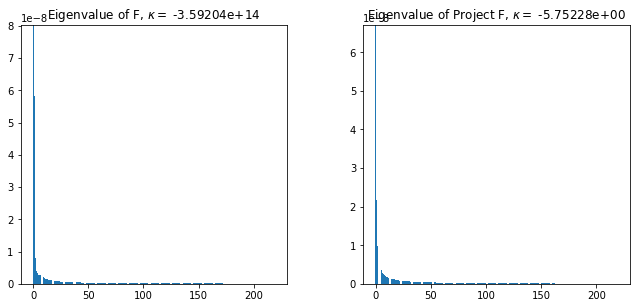

In [9]:
# eingen spectron of the operators
w, V = np.linalg.eigh(F)

w_id = np.argsort(-w)
w= w[w_id]
V = V[:,w_id]

cond_num_F = w[0]/w[-1]

pw, pV = np.linalg.eigh(PF)
w_id = np.argsort(-pw)
pw= pw[w_id]
pV = pV[:,w_id]

cond_num_PF = pw[0]/pw[-1]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
plt.tight_layout(pad=4.0, w_pad=4.5, h_pad=4.0)

ax1.set_ylim([0.0,np.max(w)])
ax1.bar(np.arange(len(w)),w)
ax1.set_title('Eigenvalue of F, $\kappa = $ ' + '{0:.5e}'.format(cond_num_F))


ax2.set_ylim([0.0,np.max(pw)])
ax2.bar(np.arange(len(pw)),pw)
ax2.set_title('Eigenvalue of Project F')
ax2.set_title('Eigenvalue of Project F, $\kappa = $ ' + '{0:.5e}'.format(cond_num_PF))

plt.show()

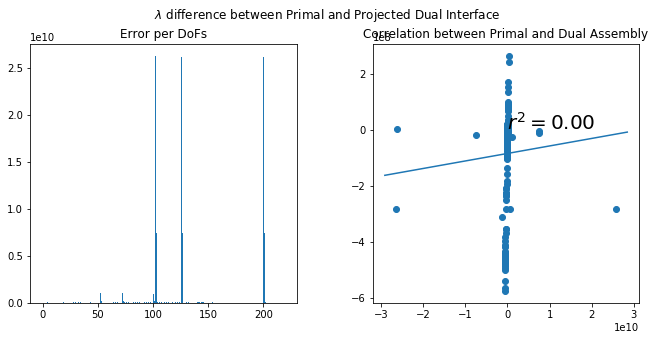

In [10]:
residual = abs(global_lambda - dual_proj_lambda )

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout(pad=4.0, w_pad=4.5, h_pad=5.0)

axs[0].bar(np.arange(len(residual)),residual)
axs[0].set_title('Error per DoFs')

axs[1].scatter(global_lambda, dual_proj_lambda )
p , residuals, rank, singular_values, rcond = np.polyfit(global_lambda , dual_proj_lambda, 1, full=True)
m = p[0]
b = p[1]
X_plot = np.linspace(axs[1].get_xlim()[0],axs[1].get_xlim()[1],100)
axs[1].plot(X_plot, m*X_plot + b, '-')

correlation = np.corrcoef(global_lambda, dual_proj_lambda)[0,1]
axs[1].set_title('Correlation between Primal and Dual Assembly')

axs[1].text(-50.0, 0.0, r"$r^2 = $" + '{0:.2f}'.format(correlation**2) , fontsize=20)

fig.suptitle('$\lambda$ difference between Primal and Projected Dual Interface')
plt.show()

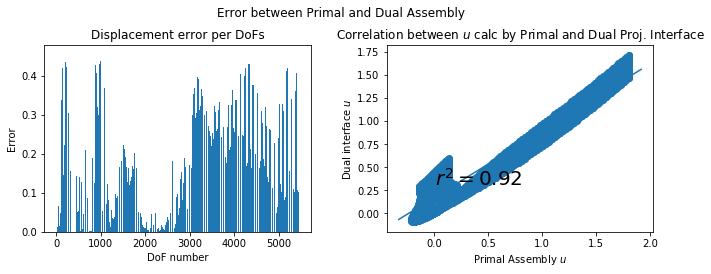

In [11]:
u = super_domain.eval_subdomain_displacement(dual_proj_lambda,alpha_proj)
u_dual_proj_int = amfe.FetiSolver.average_displacement_calc(my_system,super_domain.feti_subdomains_dict)

residual = abs(u_fea - u_dual_proj_int)
p , residuals, rank, singular_values, rcond = np.polyfit(u_fea, u_dual_proj_int, 1, full=True)
m = p[0]
b = p[1]


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=4.0, w_pad=4.5, h_pad=4.0)

axs[0].bar(np.arange(len(residual)),residual)
axs[0].set_title('Displacement error per DoFs')
axs[0].set_xlabel('DoF number')
axs[0].set_ylabel('Error')

axs[1].scatter(u_fea, u_dual_proj_int)
X_plot = np.linspace(axs[1].get_xlim()[0],axs[1].get_xlim()[1],100)
axs[1].plot(X_plot, m*X_plot + b, '-')
correlation = np.corrcoef(u_fea, u_dual_proj_int)[0,1]
axs[1].set_title('Correlation between $u$ calc by Primal and Dual Proj. Interface')
axs[1].text(0.01, 0.3, r"$r^2 = $" + '{0:.2f}'.format(correlation**2) , fontsize=20)
axs[1].set_xlabel('Primal Assembly $u$ ')
axs[1].set_ylabel('Dual interface $u$')

fig.suptitle('Error between Primal and Dual Assembly')
plt.show()

Solving Equilibrium with The Projected Dual Interface with Conjugate Gradient (PCG)
--------------------------------------------------------------------------------------

The Projected Interface equilibrium can be solve iterativaly by a Conjungate Gradient algorithm. The step are the following:

1. Initialize with $r^0 = \hat{d},  \lambda_{ker}^{0} = \tilde{0}, \beta^1 = 0 $

2. Irerate $k = 1,2..,n$ until $ \lVert w^k \rVert > tol $  
    Project residual $w^{k-1} = P_Gr^{k-1}$  
    Precondition $z^{k-1} = \bar{F^{-1}}w^{k-1}$  
    Project  $y^{k-1} = P_Gz^{k-1}$   
    $\beta^{k} = (y^{k-1})^Tw^{k-1}/(y^{k-2})^Tw^{k-2}$  
    $p^{k} = y^{k-1} + \beta^{k}p^{k-1}  $  
    $\alpha^{k} = (y^{k-1})^Tw^{k-1}/(p^{k})^TFp^{k}$  
    $\lambda_{ker}^{k} = \lambda_{ker}^{k-1} + \alpha^{k}p^{k}$  
    $r^{k} = r^{k-1} + \alpha^{k}Fp^{k}$  

3. Set solution $\lambda_{ker} = \lambda_{ker}^{k} $  

PCG has converged after 50


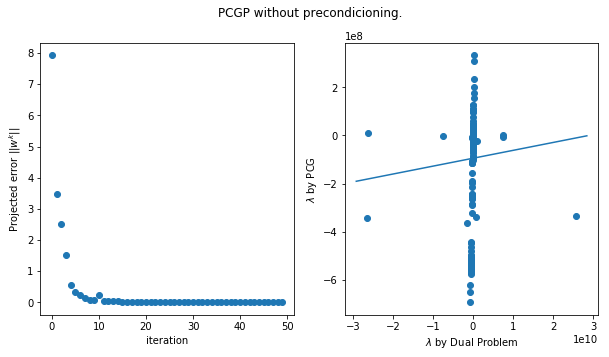

In [12]:
def PCGP(F,dhat,lambda_ker,Precond=None,tol=1.e-6,max_int = 500, save_arnold=False):
    # step 1
    beta = 0.0
    rk = dhat
    interface_size = lambda_ker.shape[0]
    lambda_ker = np.zeros(interface_size)
    
    if Precond is None:
        Precond = np.eye(interface_size,interface_size)

    alpha_list = []
    beta_list = []
    Q_list = []
    #step 2
    yk2 = np.zeros(interface_size)
    yk1 = np.zeros(interface_size)
    wk1 = np.zeros(interface_size)

    res = []
    for k in range(max_int):
        wk = P.dot(rk)

        norm_wk = np.linalg.norm(wk)
        res.append(norm_wk)
        if norm_wk<tol:
            print('PCG has converged after %i' %(k+1))
            break

        zk = Precond.dot(wk)
        yk = P.dot(zk)

        if k>1:
            #calc beta
            beta = yk.T.dot(wk)/yk1.T.dot(wk1)
        else:
            pk1 = yk

        pk = yk + beta*pk1
        Fpk = F.dot(pk)
        ak = yk.T.dot(wk)/pk.T.dot(Fpk)
        lambda_ker = lambda_ker + ak*pk
        
        #store pass data
        alpha_list.append(yk.T.dot(wk))
        beta_list.append(norm_wk)
        Q_list.append(wk)
        
        rk = rk - ak*Fpk
        
        # set n - 1 data
        yk1 = yk
        pk1 = pk
        wk1 = wk


    lambda_pgc = lambda_ker + lambda_im
    
    if save_arnold:
        return lambda_pgc, res, alpha_list,beta_list,Q_list

    return lambda_pgc, res

lambda_pgc, res = PCGP(F,dhat,lambda_ker)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))    
ax2.scatter(global_lambda,lambda_pgc)    
ax2.set_xlabel('$\lambda$ by Dual Problem')
ax2.set_ylabel('$\lambda$ by PCG')

p , residuals, rank, singular_values, rcond = np.polyfit(global_lambda ,lambda_pgc, 1, full=True)
m = p[0]
b = p[1]
X_plot = np.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
ax2.plot(X_plot, m*X_plot + b, '-')



ax1.plot(res,'o')    
ax1.set_xlabel('iteration')
ax1.set_ylabel('Projected error $||w^k||$')

fig.suptitle('PCGP without precondicioning.')
plt.show()

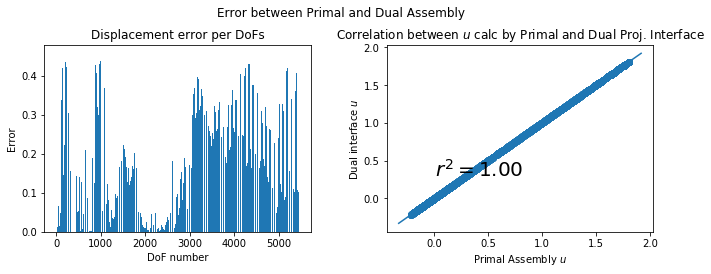

In [13]:
dtil = d - F.dot(lambda_pgc)

alpha_pgc = np.linalg.solve(GGT,G.dot(dtil))

u = super_domain.eval_subdomain_displacement(lambda_pgc,alpha_pgc)
u_dual_pgc_int = amfe.FetiSolver.average_displacement_calc(my_system,super_domain.feti_subdomains_dict)

residual = abs(u_fea - u_dual_proj_int)
p , residuals, rank, singular_values, rcond = np.polyfit(u_fea, u_dual_pgc_int, 1, full=True)
m = p[0]
b = p[1]


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=4.0, w_pad=4.5, h_pad=4.0)

axs[0].bar(np.arange(len(residual)),residual)
axs[0].set_title('Displacement error per DoFs')
axs[0].set_xlabel('DoF number')
axs[0].set_ylabel('Error')

axs[1].scatter(u_fea, u_dual_pgc_int)
X_plot = np.linspace(axs[1].get_xlim()[0],axs[1].get_xlim()[1],100)
axs[1].plot(X_plot, m*X_plot + b, '-')
correlation = np.corrcoef(u_fea, u_dual_pgc_int)[0,1]
axs[1].set_title('Correlation between $u$ calc by Primal and Dual Proj. Interface')
axs[1].text(0.01, 0.3, r"$r^2 = $" + '{0:.2f}'.format(correlation**2) , fontsize=20)
axs[1].set_xlabel('Primal Assembly $u$ ')
axs[1].set_ylabel('Dual interface $u$')

fig.suptitle('Error between Primal and Dual Assembly')
plt.show()

Different types of Precondicioner
================================

Due to the high condition-number of the Project Interface Flexibility $PF$ it is import apply a precondicioner $\bar{F}^{-1}$ to stabilize the Conjugate Gradient Algorithm. Various versions have been proposed for the FETI method: the so-called ‘Dirichlet’, ‘lumped’, ‘superlumped’ and ‘identity’ preconditioners (in decreasing order of effi-ciency and computational burden). First, let us decompose the degrees of freedom of out subdomain in boundary interface and interior, as shown below:

$$
\begin{bmatrix} K_{ii} & K_{ib} \\
                 K_{bi} & K_{bb}  
\end{bmatrix}
\begin{bmatrix} 
u_i  \\ 
u_b
\end{bmatrix}
=
\begin{bmatrix} 
f_i \\ 
f_b \end{bmatrix}
$$

Let us also define the Primal Schur Complement as:

$$ S_{bb} = K_{bb} - K_{bi}K_{ii}^{-1}K_{ib} $$

See the mathematical definition of the mentioned precondicioner are below:

$$
\bar{F}_D^{-1} = B
\begin{bmatrix}
 0 & 0 \\
 0 & S_{bb}
\end{bmatrix}
B^T
$$

$$
\bar{F}_L^{-1} = B
\begin{bmatrix}
 0 & 0 \\
 0 & K_{bb}
\end{bmatrix}
B^T
$$

$$
\bar{F}_{SL}^{-1} = B
\begin{bmatrix}
 0 & 0 \\
 0 & diag(K_{bb})
\end{bmatrix}
B^T
$$

$$
\bar{F}_I = I
$$

We also introduce a new lost cost precondicioner called Lumped Schur:

$$
\bar{F}_D^{-1} = B
\begin{bmatrix}
 0 & 0 \\
 0 & S_{L}
\end{bmatrix}
B^T
$$
Where:

$$ S_{L} = K_{bb} - K_{bi}diag(K_{ii})^{-1}K_{ib} $$


PCG has converged after 50
PCG has converged after 32
PCG has converged after 38
PCG has converged after 46
PCG has converged after 35


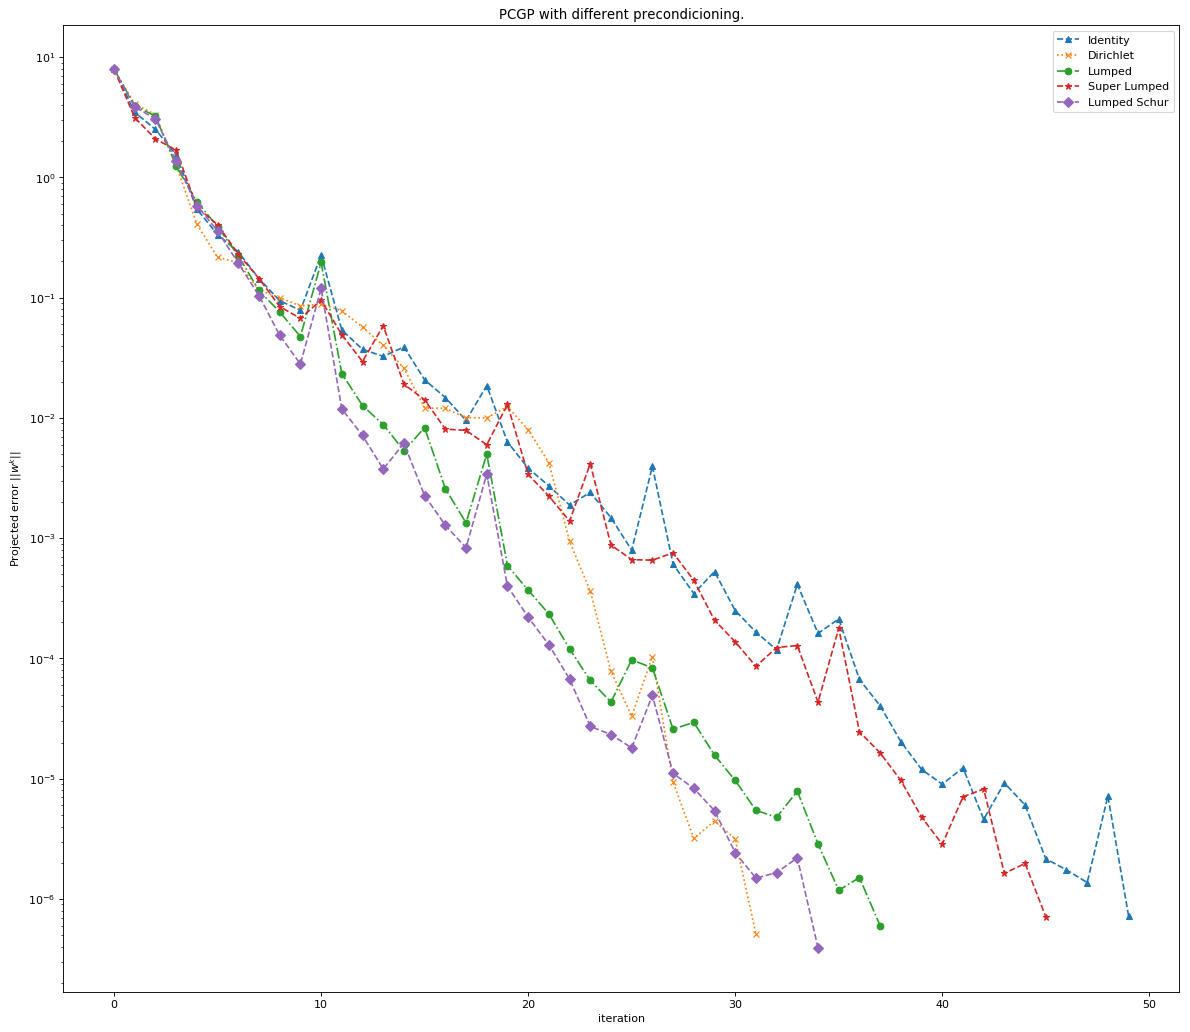

In [14]:
Sd = super_domain.assemble_block_primal_schur_complement('schur')
Sl = super_domain.assemble_block_primal_schur_complement('lumped')
Ssl = super_domain.assemble_block_primal_schur_complement('superlumped')
Sls = super_domain.assemble_block_primal_schur_complement('lumpedschur')

Fd = B.dot(Sd).dot(B.T)
Fl = B.dot(Sl).dot(B.T)
Fsl = B.dot(Ssl).dot(B.T)
Fls = B.dot(Sls).dot(B.T)

tol = 1.e-6
max_int = 50
lambda_I, res1 = PCGP(F,dhat,lambda_ker,tol=tol,max_int=max_int)
lambda_d, res2 = PCGP(F,dhat,lambda_ker,Fd,tol,max_int)
lambda_l, res3 = PCGP(F,dhat,lambda_ker,Fl,tol,max_int)
lambda_sl, res4 = PCGP(F,dhat,lambda_ker,Fsl,tol,max_int)
lambda_ls, res5 = PCGP(F,dhat,lambda_ker,Fls,tol,max_int)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(res1,'^--',label="Identity")    
plt.plot(res2,'x:',label="Dirichlet")    
plt.plot(res3,'o-.',label="Lumped")    
plt.plot(res4,'*--',label="Super Lumped")    
plt.plot(res5,'D--',label="Lumped Schur")    


plt.xlabel('iteration')
plt.ylabel('Projected error $||w^k||$')
plt.title('PCGP with different precondicioning.')
plt.yscale("log", nonposy='clip')
plt.legend(loc='upper right')
plt.show()

In [15]:
lambda_I, res1, a, b, Q_list = PCGP(F,dhat,lambda_ker,tol=1.e-20, max_int=6,save_arnold= True)

In [16]:
from scipy.sparse import diags

diagonals = [b[1:], a, b[1:]]
H1 = diags(diagonals, [-1, 0, 1]).toarray()
Q = np.matrix(Q_list)

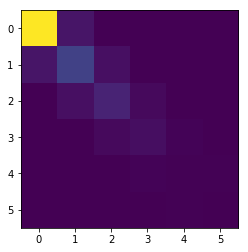

In [17]:
plt.imshow(H1)
plt.show()

In [18]:
H1

array([[ 62.86097709,   3.4823851 ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  3.4823851 ,  12.12700597,   2.50660227,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   2.50660227,   6.28305492,   1.53795692,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   1.53795692,   2.36531149,
          0.54456516,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.54456516,
          0.29655122,   0.33488361],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.33488361,   0.11214703]])

In [19]:
H = Q.dot(F).dot(Q.T)
print(H)

[[  2.99908006e-06  -5.78576146e-07   8.65163626e-07  -2.37857721e-07
    3.21584493e-09  -3.16459535e-11]
 [ -5.78576146e-07   3.86921441e-07  -2.00465693e-07   1.81839941e-19
   -1.56172734e-18   7.62739169e-17]
 [  8.65163626e-07  -2.00465693e-07   2.57518422e-07  -5.78452588e-08
    1.35672737e-18  -7.11944905e-17]
 [ -2.37857721e-07   1.38708263e-19  -5.78452588e-08   3.34826066e-08
   -1.46767229e-09   1.28208991e-17]
 [  3.21584493e-09  -1.55968606e-18   1.35663943e-18  -1.46767229e-09
    5.34784969e-10  -1.32653029e-10]
 [ -3.16459535e-11   7.62746522e-17  -7.11932242e-17   1.28201071e-17
   -1.32653029e-10   2.48697238e-10]]


In [20]:
Q.dot(Q.T)

matrix([[  6.28609771e+01,   5.12908956e-15,   1.81339043e+01,
          -4.98551837e+00,   6.74043873e-02,  -6.63300643e-04],
        [  5.12908956e-15,   1.21270060e+01,  -3.66743847e-15,
           2.86204116e-12,  -2.85417528e-11,   1.27531865e-09],
        [  1.81339043e+01,  -3.66743847e-15,   6.28305492e+00,
          -1.48442370e-12,   2.03432306e-11,  -1.11530291e-09],
        [ -4.98551837e+00,   2.86204116e-12,  -1.48442370e-12,
           2.36531149e+00,  -2.09177814e-12,   1.79893912e-10],
        [  6.74043873e-02,  -2.85417528e-11,   2.03432306e-11,
          -2.09177814e-12,   2.96551215e-01,  -1.10005082e-12],
        [ -6.63300643e-04,   1.27531865e-09,  -1.11530291e-09,
           1.79893912e-10,  -1.10005082e-12,   1.12147031e-01]])

In [21]:
eigval, eigvec = scipy.linalg.eigh(H)

In [22]:
eigval

array([  2.96278781e-19,   1.56679174e-10,   4.36370860e-10,
         1.05017727e-08,   2.75147340e-07,   3.39154385e-06])

In [23]:
eigvec

array([[ -2.68954443e-01,   3.63740260e-03,  -5.73006690e-03,
          6.03107785e-02,  -2.07883680e-01,   9.38490505e-01],
       [ -2.94688406e-07,   1.41468324e-02,  -2.08700117e-02,
         -2.07445344e-01,  -9.57472611e-01,  -1.98939534e-01],
       [  7.76245094e-01,   1.67958013e-02,  -2.36981590e-02,
         -5.63592122e-01,   6.61255202e-02,   2.73113874e-01],
       [ -5.66893998e-01,   8.01032027e-02,  -1.18697636e-01,
         -7.85756205e-01,   1.88801833e-01,  -7.11800320e-02],
       [  6.11197487e-02,   5.67409884e-01,  -8.09951414e-01,
          1.35190237e-01,  -3.44348528e-03,   9.20820321e-04],
       [ -1.62260536e-03,   8.19227708e-01,   5.73462801e-01,
         -1.93522153e-03,   2.55926717e-05,  -8.79357610e-06]])

In [24]:
h1 = np.array(H.diagonal()).flatten()
h2 = np.array(H.diagonal(-1)).flatten()
eigval, eigvec = scipy.linalg.eigh_tridiagonal(h1,h2)

In [25]:
eigval

array([ -1.06947529e-10,   2.87569003e-10,   3.02832573e-09,
         9.17495171e-08,   4.60729192e-07,   3.12209836e-06])

In [26]:
eigvalF, eigvecF = scipy.linalg.eigh(F)

In [27]:
eigvalF

array([ -2.23831182e-22,  -1.37863457e-22,   1.37891317e-22,
         2.23738707e-22,   4.82589114e-11,   5.11721796e-11,
         5.50199148e-11,   5.53272033e-11,   5.70157670e-11,
         6.01045933e-11,   6.34012218e-11,   6.49981849e-11,
         6.51203854e-11,   6.53862948e-11,   6.55901363e-11,
         6.60886477e-11,   6.62781421e-11,   6.67319793e-11,
         6.70392702e-11,   6.73748952e-11,   6.78737552e-11,
         6.82766304e-11,   6.90869044e-11,   7.00659780e-11,
         7.02246080e-11,   7.11197356e-11,   7.15549857e-11,
         7.22223983e-11,   7.46886174e-11,   7.47412274e-11,
         7.52743253e-11,   7.72683246e-11,   7.74721391e-11,
         7.77616460e-11,   7.81750616e-11,   7.87702138e-11,
         7.96999496e-11,   8.03383800e-11,   8.12285472e-11,
         8.43436452e-11,   8.45666289e-11,   8.66749361e-11,
         8.79677505e-11,   9.05945045e-11,   9.17320269e-11,
         9.23637991e-11,   9.42414144e-11,   9.48018198e-11,
         9.51104682e-11,

In [28]:
eigvalH1, eigvecH1 = scipy.linalg.eigh(H1)

In [29]:
eigvalH1

array([ -0.19975684,   0.4391203 ,   1.92152838,   5.91292023,
        12.87182774,  63.0994079 ])